In [13]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

### Data Loading

In [14]:
adult_data = pd.read_csv("dataset/adult.data.csv")

In [15]:
adult_data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


#### Display column names

In [16]:
adult_data.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

#### Rename Columns

In [17]:
adult_data.rename(columns = {"39":"Age", ' Not-in-family':'Relationship', " White":"Race", " Male":"Gender", " Never-married":"Marital-status", 
                             " United-States":"Native-country", " 77516":"fnlwgt", " State-gov":"workclass", 
                             " Bachelors":"Education", " 13":"Education-num", " Adm-clerical":"Ocupation", " 2174":"Capital-gain", " 0":"capital-loss", 
                            " 40":"Hours-per-week", " <=50K":"Label"},
                  inplace = True)

In [18]:
adult_data.columns

Index(['Age', 'workclass', 'fnlwgt', 'Education', 'Education-num',
       'Marital-status', 'Ocupation', 'Relationship', 'Race', 'Gender',
       'Capital-gain', 'capital-loss', 'Hours-per-week', 'Native-country',
       'Label'],
      dtype='object')

#### Get data type info

In [19]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education-num   32560 non-null  int64 
 5   Marital-status  32560 non-null  object
 6   Ocupation       32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Gender          32560 non-null  object
 10  Capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  Hours-per-week  32560 non-null  int64 
 13  Native-country  32560 non-null  object
 14  Label           32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Convert Label column data values

In [20]:
def convert_label(label):
    if label == " <=50K":
        label = "below"
    elif label == " >50K":
        label = "above"
    else :
        label = "nan"
    return label

In [21]:
adult_data.Label[32559]

' >50K'

In [22]:
adult_data.Label = adult_data.Label.apply(convert_label)

In [23]:
adult_data.Label.value_counts()

below    24719
above     7841
Name: Label, dtype: int64

In [25]:
adult_data.head()

,Age,workclass,fnlwgt,Education,Education-num,Marital-status,Ocupation,Relationship,Race,Gender,Capital-gain,capital-loss,Hours-per-week,Native-country,Label
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,below
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,below
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,below
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,below
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,below


#### encode target labels

In [27]:
le = LabelEncoder()

adult_data.Label = le.fit_transform(adult_data.Label)

In [30]:
le.classes_

array(['above', 'below'], dtype=object)

#### Convert Categorical columns

In [31]:
categorical_types = ["workclass","Education", "Marital-status", "Ocupation", "Race", "Gender", "Relationship", "Native-country"]

In [32]:
adult_data[categorical_types].head()

,workclass,Education,Marital-status,Ocupation,Race,Gender,Relationship,Native-country
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,Husband,United-States
1,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,Not-in-family,United-States
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,Husband,United-States
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,Wife,Cuba
4,Private,Masters,Married-civ-spouse,Exec-managerial,White,Female,Wife,United-States


In [33]:
adult_data[categorical_types] = adult_data[categorical_types].astype('category')

In [34]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             32560 non-null  int64   
 1   workclass       32560 non-null  category
 2   fnlwgt          32560 non-null  int64   
 3   Education       32560 non-null  category
 4   Education-num   32560 non-null  int64   
 5   Marital-status  32560 non-null  category
 6   Ocupation       32560 non-null  category
 7   Relationship    32560 non-null  category
 8   Race            32560 non-null  category
 9   Gender          32560 non-null  category
 10  Capital-gain    32560 non-null  int64   
 11  capital-loss    32560 non-null  int64   
 12  Hours-per-week  32560 non-null  int64   
 13  Native-country  32560 non-null  category
 14  Label           32560 non-null  int64   
dtypes: category(8), int64(7)
memory usage: 2.0 MB


#### Check for null values

In [35]:
adult_data.isna().sum()

Age               0
workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Ocupation         0
Relationship      0
Race              0
Gender            0
Capital-gain      0
capital-loss      0
Hours-per-week    0
Native-country    0
Label             0
dtype: int64

### Exploratory Data Analysis

##### check statistical summary

In [36]:
adult_data.describe()

,Age,fnlwgt,Education-num,Capital-gain,capital-loss,Hours-per-week,Label
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.759183
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,1.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,1.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


##### The demographic analysis reveals an average age of 38.6, with the eldest citizen at 90 and the youngest at 17 years old, providing valuable insights for businesses operating within the region.
##### The working hours analysis indicates a wide range, with the highest recorded at 99 hours per week, while the mean and median stand at 40.44 hours, and the lowest recorded working hours being 1.

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
adult_data.columns

Index(['Age', 'workclass', 'fnlwgt', 'Education', 'Education-num',
       'Marital-status', 'Ocupation', 'Relationship', 'Race', 'Gender',
       'Capital-gain', 'capital-loss', 'Hours-per-week', 'Native-country',
       'Label'],
      dtype='object')

#### compare the number of male and female

#####  In this comparison, the bar representing the number of males is approximately twice the length of the bar representing the number of females, indicating that the male population outnumbers the female population in the given population.

<AxesSubplot:xlabel='Gender', ylabel='count'>

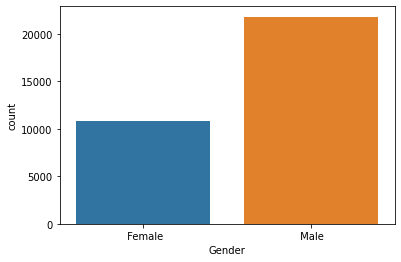

In [40]:
sns.countplot(adult_data.Gender)

##### The analysis of occupation categories reveals several insights regarding the distribution of different roles within the dataset. The most prevalent occupations are "Prof-specialty," "Craft-repair," and "Exec-managerial," indicating a significant presence of skilled professionals and managerial roles. Additionally, service-oriented and administrative positions, such as "Adm-clerical," "Sales," and "Other-service," exhibit substantial counts. However, there is a lower representation of manual labor and specialized fields, as seen in categories like "Farming-fishing," "Handlers-cleaners," and "Priv-house-serv." The presence of unclassified or missing data denoted by "?" suggests a need for further investigation or data cleaning. Notably, the absence of data for the "Armed-Forces" category indicates its lack of representation within the dataset. These insights provide valuable information for understanding the occupational composition and can guide decision-making processes related to workforce planning, career development, and resource allocation in relevant industries.

#### The analysis of marital status within the dataset reveals several insights. The most common marital status is "Married-civ-spouse," with a count of 14,976, indicating a significant portion of the population is in a married civilian relationship. The second most prevalent category is "Never-married," with 10,682 individuals indicating a sizable proportion of the dataset consists of unmarried individuals. The category "Divorced" has a count of 4,443, suggesting a significant number of individuals have gone through a divorce. "Separated" and "Widowed" categories have counts of 1,025 and 993, respectively, indicating smaller but notable populations in these marital statuses. The categories "Married-spouse-absent" and "Married-AF-spouse" have lower counts, with 418 and 23 individuals respectively, suggesting a smaller representation of individuals in these specific marital situations. These insights provide valuable information for understanding the marital composition within the dataset and can guide decision-making processes related to relationship-oriented services, family-focused marketing strategies, and social support programs.

##### The analysis of relationship categories within the dataset reveals several insights. The most common relationship category is "Husband," with a count of 13,193, indicating a significant number of individuals in the dataset are husbands. The category "Not-in-family" has a count of 8,304, suggesting a sizable portion of the population consists of individuals who are not living with family members. The category "Own-child" has a count of 5,068, indicating a significant number of individuals are classified as children within the dataset. The category "Unmarried" has a count of 3,446, representing individuals who are not currently married. The category "Wife" has a count of 1,568, indicating a smaller but notable population of wives within the dataset. The category "Other-relative" has a count of 981, suggesting the presence of individuals who have a different type of family relationship. These insights provide valuable information for understanding the relational composition within the dataset and can guide decision-making processes related to family-oriented services, targeted marketing strategies, and social support programs.

##### The analysis of countries of origin within the dataset reveals several insights. The most common country of origin is the "United States," with a count of 29,169, indicating a significant number of individuals in the dataset are from the United States. The country "Mexico" has a count of 643, suggesting a notable population of individuals originating from Mexico. The category "?" represents missing or unclassified data with a count of 583. Other countries with significant representation in the dataset include the "Philippines" (198), "Germany" (137), "Canada" (121), and "Puerto Rico" (114). Additionally, countries like "El Salvador" (106), "India" (100), "Cuba" (95), and "England" (90) are also represented, although with smaller counts. These insights provide valuable information for understanding the diversity of nationalities within the dataset and can guide decision-making processes related to cultural sensitivity, language preferences, and targeted outreach efforts for specific immigrant populations.

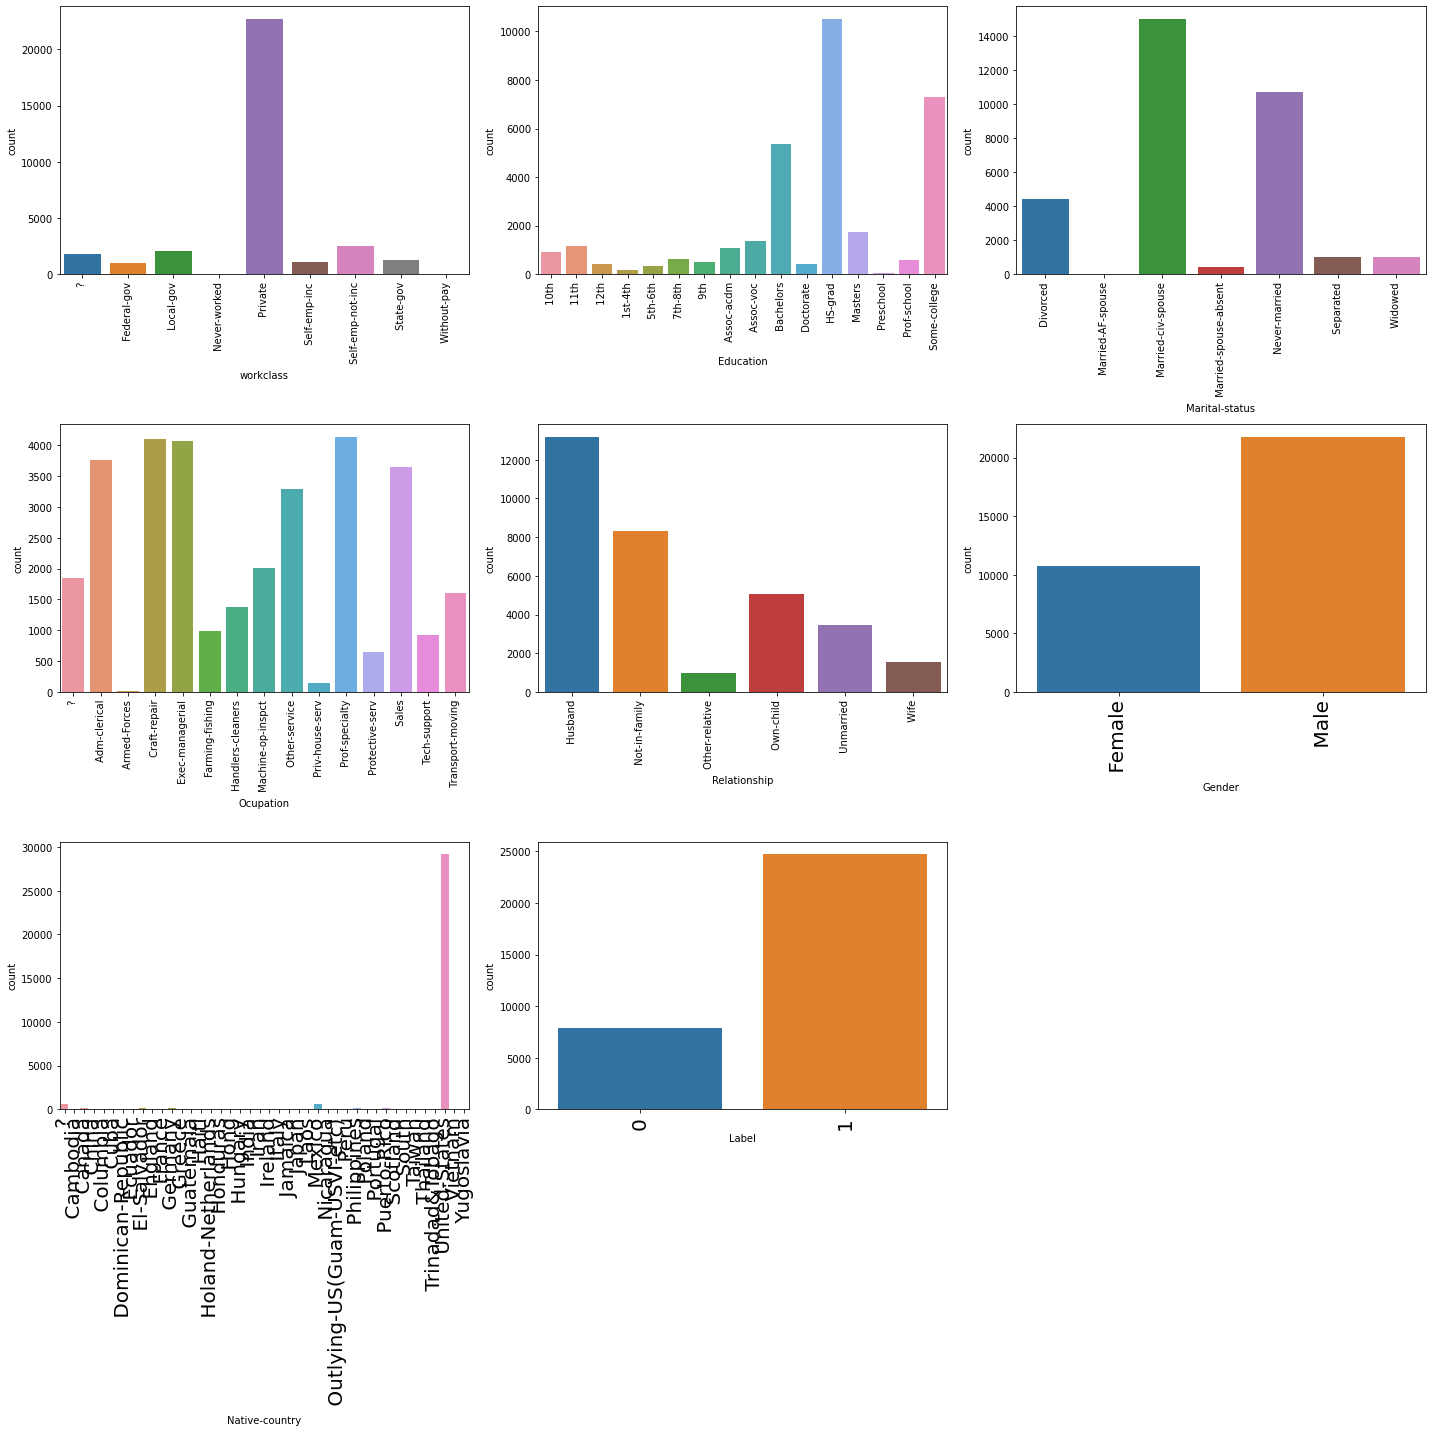

In [47]:
plt.figure(figsize=(20,20))


plt.subplot(331)
sns.countplot(adult_data['workclass'])
plt.xticks(rotation=90)

plt.subplot(332)
sns.countplot(adult_data['Education'])
plt.xticks(rotation=90)

plt.subplot(333)
sns.countplot(adult_data['Marital-status'])
plt.xticks(rotation=90)

plt.subplot(334)
sns.countplot(adult_data['Ocupation'])
plt.xticks(rotation=90)
                         
plt.subplot(335)
sns.countplot(adult_data['Relationship'])
plt.xticks(rotation=90)

plt.subplot(336)
sns.countplot(adult_data['Gender'])
plt.xticks(rotation=90)
plt.xticks(fontsize=20)

plt.subplot(337)
sns.countplot(adult_data['Native-country'])
plt.xticks(rotation=90)
plt.xticks(fontsize=20)

plt.subplot(338)
sns.countplot(adult_data['Label'])
plt.xticks(rotation=90)
plt.xticks(fontsize=20)                       
                         

plt.tight_layout()
plt.show()

#### PLot the proportions for the each category in the categorical columns

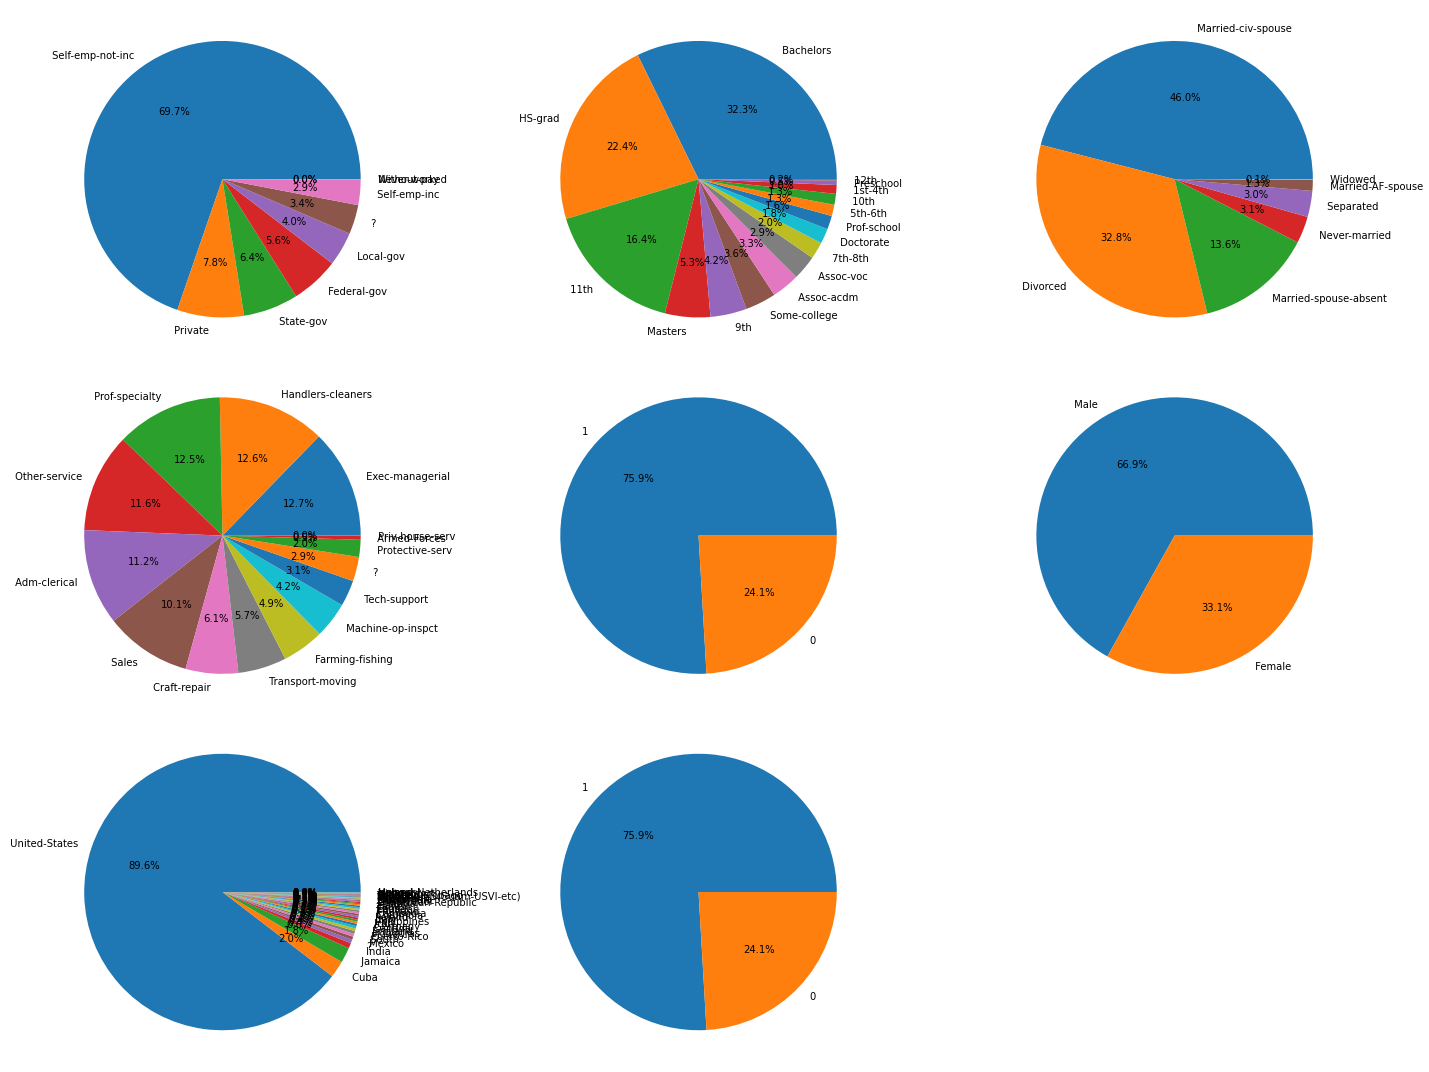

In [49]:
plt.figure(figsize=(20,15))


plt.subplot(331)
plt.pie(adult_data['workclass'].value_counts(),labels=adult_data['workclass'].unique(), autopct='%1.1f%%')
plt.xticks(fontsize=25)

plt.subplot(332)
plt.pie(adult_data['Education'].value_counts(),labels=adult_data['Education'].unique(), autopct='%1.1f%%')
plt.xticks(fontsize=25)

plt.subplot(333)
plt.pie(adult_data['Marital-status'].value_counts(),labels=adult_data['Marital-status'].unique(), autopct='%1.1f%%')
plt.xticks(fontsize=25)


plt.subplot(334)
plt.pie(adult_data['Ocupation'].value_counts(),labels=adult_data['Ocupation'].unique(), autopct='%1.1f%%')
plt.xticks(fontsize=25)


                         
plt.subplot(335)
plt.pie(adult_data['Label'].value_counts(),labels=adult_data['Label'].unique(), autopct='%1.1f%%')
plt.xticks(fontsize=25)


plt.subplot(336)
plt.pie(adult_data['Gender'].value_counts(),labels=adult_data['Gender'].unique(), autopct='%1.1f%%')
plt.xticks(fontsize=25)


plt.subplot(337)
plt.pie(adult_data['Native-country'].value_counts(),labels=adult_data['Native-country'].unique(), autopct='%1.1f%%')
plt.xticks(fontsize=25)


plt.subplot(338)
plt.pie(adult_data['Label'].value_counts(),labels=adult_data['Label'].unique(), autopct='%1.1f%%')
                         

plt.tight_layout()
plt.show()

##### Lets compare the proportions for the Occupation variable

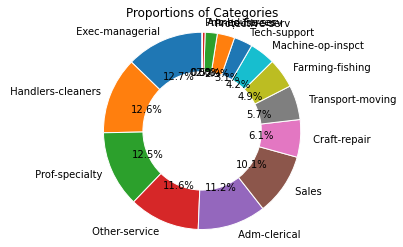

In [50]:
# Create a donut chart
fig, ax = plt.subplots()

# Draw the outer circle (representing the entire donut)
ax.pie([100], radius=1, colors='white', wedgeprops=dict(width=0.3, edgecolor='white'))

# Draw the inner circle (representing the donut slices)
ax.pie(adult_data['Ocupation'].value_counts(), labels=adult_data['Ocupation'].unique(), autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4, edgecolor='white'))

# Add a title
ax.set_title('Proportions of Categories')

# Equal aspect ratio ensures that the donut is circular
ax.axis('equal')

# Display the chart
plt.show()

#### Lets look at the continuous variables trends and insights

#### The age variable exhibits a positevely skewed distribution, indicating that the majority of the data points are concentrated towards higher ages, with the tail of the distribution extending towards younger ages. The age range spans from 20 to 90, indicating a spread of 70 years. Notably, there are no indications of outliers, suggesting that there are no extreme age values that deviate significantly from the overall pattern of the data.

(array([5570., 5890., 6048., 6162., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

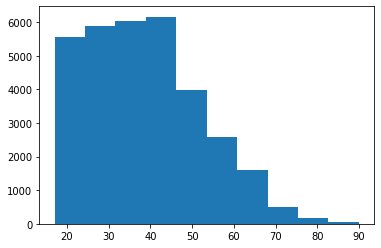

In [56]:
plt.hist(adult_data.Age)

#### Comparing the male and female age distributions

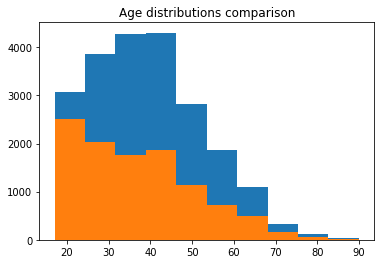

In [88]:
plt.hist(adult_data[adult_data['Gender'] == ' Male']['Age'])
plt.hist(adult_data[adult_data['Gender'] == ' Female']['Age'])
plt.title("Age distributions comparison")
plt.show()

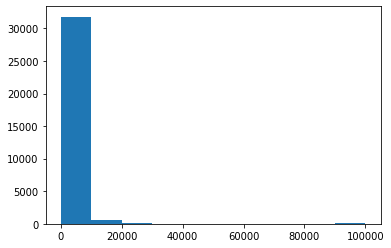

In [91]:
plt.hist(adult_data["Capital-gain"], bins=10)
plt.show()

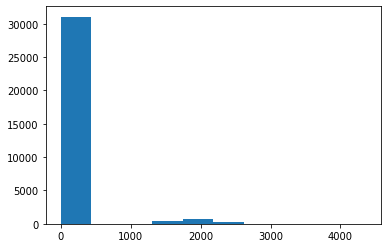

In [92]:
plt.hist(adult_data["capital-loss"], bins=10)
plt.show()

##### The majority of citizens work 40 hours per week 

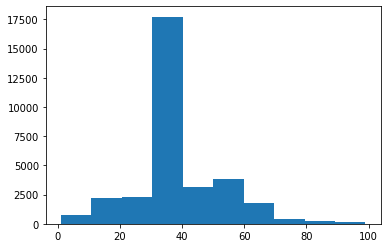

In [94]:
plt.hist(adult_data["Hours-per-week"])
plt.show()

#### women work less than men by almost half their time

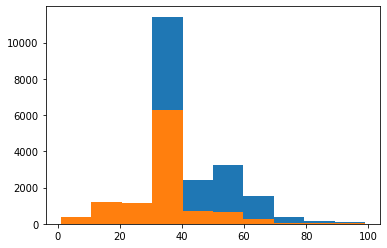

In [96]:
plt.hist(adult_data[adult_data['Gender'] == ' Male']['Hours-per-week'])
plt.hist(adult_data[adult_data['Gender'] == ' Female']['Hours-per-week'])

plt.show()

#### This signifies that their is no apparent relationship between Age and hour-per-week

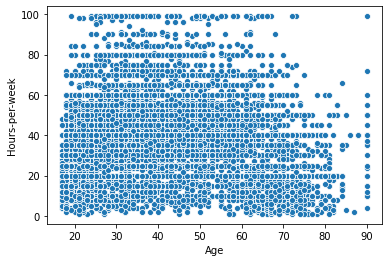

In [103]:
sns.scatterplot(data=adult_data, x="Age", y="Hours-per-week")
plt.show()

#### Comparing the scatter plot for age vs hours-per-week for different genders

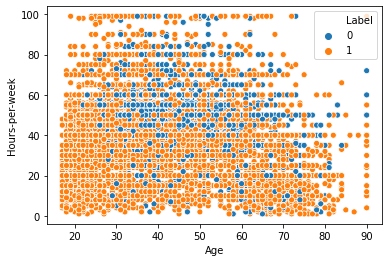

In [104]:
sns.scatterplot(data=adult_data, x="Age", y="Hours-per-week", hue="Label")
plt.show()

In [110]:
adult_data.isnull().sum()

Age               0
workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Ocupation         0
Relationship      0
Race              0
Gender            0
Capital-gain      0
capital-loss      0
Hours-per-week    0
Native-country    0
Label             0
dtype: int64

## End